# Chapter 24 - Exercises

In [1]:
import math
from scipy.stats import t
import scipy.stats
import numpy as np
import pandas as pd

from statistics import stdev, mean
from statistics import variance

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
def degrees_freedom(s1, n1, s2, n2):
    """
    Calculate degrees freedom for a two-sample $t$-test under assumptions of unequal variances.
    """
    n = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2
    d = (1 / (n1 - 1)) * (s1 ** 2 / n1) ** 2 + (1 / (n2 - 1)) * (s2 ** 2 / n2) ** 2
    return n / d

In [3]:
template = """
diff: {diff}
se: {se}
df: {df}
t*: {tval}
P-value: {pvalue}
"""

## 24.1

### Answers

* Yes, it would: The p value is > 0.05.

## 24.3 

### Answers

* a) We're 90% confident that the average fat content of beef dogs is greater than that of meat dogs.
* b) We would reject a null hypothesis (at the 90% confidence level) that there's no difference in average fat content.  In other words, the evidence supports the claim that the average fat content of beef dogs is greater than meat dogs.
* c) Alpha = 0.10

## 24.5

### Answers

* a) false: CI relates to averages, not individuals
* b) false: CI is about average, not individuals
* c) true
* d) false: our previous sample doesn't determine following samples
* e) true

## 24.7

### Answers

* a) 2.93
* b) larger
* c) We are 95% confidence that the true difference in mean scores is captured by the range 5.573 to 11.427.

In [4]:
# a)
me = (11.427 - 5.573) / 2
print("me: {}".format(me))

me: 2.9269999999999996


## 24.9

### Answers

* a) 
  * H0: mu(CPMP) - mu(traditional) = 0
  * HA: mu(CPMP) - mu(traditional) <> 0
* b) yes: randomly sampled (? not specified), samples are independent, groups are independent, < 10% of overall population
* c) Assuming there's no difference in the mean scores between the two groups, we would expect the results we obtained (or more extreme results) to occur purely due to sampling variability les than 0.01% of the time.
* d) The evidence supports the claim that there is a significant, non-zero difference in mean scores between thetwo groups.

## 24.11

### Answers

* a) (-4.64, -1.36)
* b) He can expect to save _some_ time with route A, but the savings will typically be less than 5 minutes (closer to 3)
* c) The 95% CI doesn't include a savings of 5 minutes -- so we're 95% confident that the level of savings across average travel times _doesn't_ extend to that amt of time.

In [16]:
# a)
ya = 40
sa = 3
yb = 43
sb = 2

se = math.sqrt(sa ** 2 / 20 + sb ** 2 / 20)
print("se: {}".format(se))

se: 0.806225774829855


In [18]:
tval = t.ppf(0.975, df=degrees_freedom(sa, 20, sb, 20))
print("t: {}".format(tval))

t: 2.0342746225292307


In [19]:
y = ya - yb
(y - tval * se, y, y + tval * se)

(-4.64008463376534, -3, -1.3599153662346601)

## 24.13

### Answers

* (32.494273007231655, 36.64642857142857, 40.79858413562549)
* note: answer key shows (32.15, 40.82) --> todo: what's behind the difference?
  * solved: the data in the book is different from the data in the file; the answer provided in the key was based of the _file_ data, not the book data

children's: mean 46.85, stddev: 6.600646135929777, n: 18
adult's: mean 10.366666666666667, stddev: 7.671826580216935, n: 27
diff: 36.483333333333334
df: 40.12804327972698


(32.148870819886916, 36.483333333333334, 40.81779584677975)

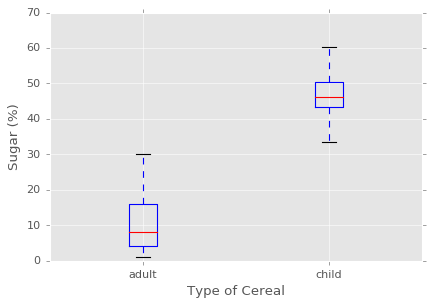

In [62]:
# Children's Cereal
c = [40.3, 55, 45.7, 43.3, 50.3, 53.5, 43, 44.2, 44, 47.4, 44, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6] # <- file
# c = [40.3, 55, 45.7, 43.3, 50.3, 45.9, 53.5, 43, 44.2, 44, 47.4, 44, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6] # <- book version

# Adults' Cereals
a = [20, 30.2, 2.2, 7.5, 22.2, 16.6, 14.5, 21.4, 3.3, 6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 10, 1, 4.4, 1.3, 8.1, 4.7, 18.4] # <- file
#a = [20, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 10, 1, 4.4, 1.3, 8.1, 4.7, 18.4] # <- book version

nc = len(c)
yc = mean(c)
sc = stdev(c) #6.24718884147 #
print("children's: mean {}, stddev: {}, n: {}".format(yc, sc, nc))


na = len(a)
ya = mean(a)
sa = stdev(a) #7.47522011825 
print("adult's: mean {}, stddev: {}, n: {}".format(ya, sa, na))

# create a boxplot
plt.xlabel("Type of Cereal")
plt.ylabel("Sugar (%)")
plt.boxplot([a, c], labels=['adult', 'child']);

# assume randomly selected, 
# should be independent both internally (one cereal's content doesn't affect anothers) and across groups

diff = yc - ya
print("diff: {}".format(diff))

se = math.sqrt((sc ** 2 / nc) + (sa ** 2 / na))
df = degrees_freedom(sc, nc, sa, na)

print("df: {}".format(df))
tstar = t.ppf(0.975, df=df)

(diff - tstar * se, diff, diff + tstar * se)

In [35]:
# confirm via direct call 
t.interval(alpha=0.95, loc=diff, scale=se, df=df)

(32.494273007231655, 40.79858413562549)

## 24.15

### Answers

* NOTE: The data displayed in the book (and used for the answer generated in the key) is _slightly different_ from the data in the associated file!  I spent about an hour trying to figure out why the results I obtained were slightly different from those in the answer key.  Beware!

* some questions about assumptions -- they all have same teacher, in same class, so not clear whether they're truly independent; 
* hypotheses:
    * H0: mu(new) - mu(control) = 0
    * HA: mu(new) - mu(control) > 0
* pValue = 0.0168
* t = 2.207
* yes - the data supports the claim that the new activitly lead to better scores on average

In [60]:
new_activity = [24, 33, 43, 43, 43, 46, 49, 52, 53, 54, 56, 57, 58, 59, 61, 62, 67, 71]
#control = [10, 17, 20, 26, 28, 33, 37, 37, 41, 42, 42, 42, 43, 48, 53, 55, 55, 60, 62, 85]  # <- file version
control = [10, 17, 20, 26, 28, 33, 37, 37, 41, 42, 42, 42, 42, 42, 43, 48, 53, 55, 55, 60, 62, 85] # <- book version

yn = mean(new_activity)
sn = stdev(new_activity)
nn = len(new_activity)
print("yn: {}".format(yn))

yc = mean(control)
sc = stdev(control)
nc = len(control)
print("yc: {}".format(yc))

diff = yn - yc
print("diff: {}".format(diff))

se = math.sqrt(sn ** 2 / nn + sc ** 2 / nc)
print("se: {}".format(se))

df = degrees_freedom(sn, nn, sc, nc)
print("df: {}".format(df))

tcrit = diff / se
print("t*: {}".format(tcrit))

pValue = 1 - t.cdf(tcrit, df =df)
print("p-value: {}".format(pValue))

yn: 51.72222222222222
yc: 41.81818181818182
diff: 9.904040404040401
se: 4.487242309778091
df: 37.27648898155618
t*: 2.2071552459867467
p-value: 0.01676886185826776


## 24.17

### Answers

* a) see below
* b) see below
* c) no: looks like 10.5 is still within ~ 1.5 IQR for national, and is just beyond middle quartiles for american
* d) two CI's wouldn't factor in their combined variance

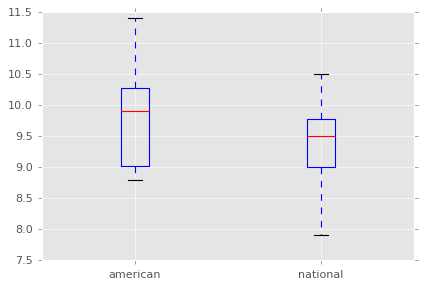

In [3]:
# a)
american = [11.4, 9.9, 10.5, 9.7, 10.5, 9.1, 10.3, 9.0, 10.2, 9.0, 10.0, 8.9, 9.9, 8.8]
national = [10.5, 9.5, 10.3, 9.4, 10.0, 9.1, 10.0, 9.0, 9.7, 9.0, 9.7, 8.9, 9.6, 8.9, 9.5, 7.9]

plt.boxplot([american, national], labels=['american', 'national']);

In [4]:
# b)
na = len(american)
ya = mean(american)
sa = stdev(american)

se = sa / math.sqrt(na)
tval = t.ppf(0.975, df=na-1)

(ya - tval * se, ya, ya + tval * se)

(9.35853226343524, 9.8, 10.241467736564761)

## 24.19

### Answers

* a) (-0.20, 0.92)
* b) We're 95% confident that the mean difference in runs is captured by the interval from -0.20 to 0.92.
* c) This suggests that there may be no difference in averages between leagues -- in that the interval includes 0.

In [5]:
# a)
nn = len(national)
yn = mean(national)
sn = stdev(national)

diff = ya - yn

se = math.sqrt(sa ** 2 / na + sn ** 2 / nn)

(diff - tval * se, diff, diff + tval * se)

(-0.19773081002212356, 0.3625000000000007, 0.922730810022125)

## 24.21

### Answers

* The groups aren't independent - the scores are paired for each worker, before and after the program.  

## 24.23

### Answers

* a) The p-value indicates that even under the assumption that there's no difference in means, we'd see results like we obtained (or more extreme) at least 13.6% of the time.  So the evidence _doesn't_ support the claim that there's a true difference in means.
* b) see below: in this case, we can reject the null hypothesis, given the very low P-value -- the evidence does suggest a difference in mean values.

In [4]:
nn = 108
yn = 3.17
sn = 1.77

ns = 108
ys = 1.71
ss = 1.76

diff = yn - ys
se = math.sqrt(sn ** 2 / nn + ss ** 2 / ns)

tval = diff / se
df = degrees_freedom(sn, nn, ss, ns)

pvalue = (1 - t.cdf(tval, df=df)) * 2

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 1.46
se: 0.24018704131325408
df: 213.99313084299692
t*: 6.078596047552186
P-value: 5.493436594505852e-09



## 24.25

### Answers

* a) Yes: see p-value generated below
* b) (1.46, 2.40) => we're 95% confident that the true diff in mean between neutral and sexual content groups is captured by the range 1.46 to 2.40.

In [14]:
# a) 

nv = 101
yv = 3.02
sv = 1.61

nn = 103
yn = 4.65
sn = 1.62

diff = yv - yn
se = math.sqrt(sv ** 2 / nv + sn ** 2 / nn)
df = degrees_freedom(sv, nv, sn, nn)

tval = diff / se
pvalue = t.cdf(tval, df=df) * 2

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: -1.6300000000000003
se: 0.2261503218793398
df: 201.9631163740819
t*: -7.20759531295149
P-value: 1.1132935122243388e-11



In [18]:
# b)

ns = 106
ys = 2.72
ss = 1.85

diff = ys - yn
se = math.sqrt(ss ** 2 / ns + sn ** 2 / nn)
df = degrees_freedom(ss, ns, sn, nn)

tval = t.ppf(0.975, df=df)

print(template.format(diff=diff, se=se, tval=tval, pvalue="NA", df=df))

(diff - tval * se , diff, diff + tval * se)


diff: -1.9300000000000002
se: 0.24034838776147854
df: 204.8114196034898
t*: 1.9716142788080284
P-value: NA



(-2.40387431319902, -1.9300000000000002, -1.4561256868009802)

## 24.27

### Answers

* H0: mu(large) - mu(small) == 0
* HA: mu(large) - mu(small) != 0
* p-value = 0.0428 => reject null hypothesis; there's evidence to support claim that there is a non-zero difference in means across groups.

In [24]:
ns = 26
ys = 5.07
ss = 1.84

nl = 22
yl = 6.58
sl = 2.91

diff = yl - ys
se = math.sqrt(ss ** 2 / ns + sl ** 2 / nl)
df = degrees_freedom(ss, ns, sl, nl)

tval = diff / se
pvalue = 2 * (1 - t.cdf(tval, df=df))

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 1.5099999999999998
se: 0.7177248922665432
df: 34.3131874260674
t*: 2.1038701823918733
P-value: 0.04279256750562066



## 24.29

### Answers

* a) yes - the low p-value allows us to reject H0, providing evidence that there is a positive difference in mean values between the two groups
* b) no - it reduces the standard error, but doesn't increase confidence level

In [8]:
nb = 7537
yb = 150

na = 15109
ya = 147

se = 1.22

# H0: yb - ya = 0
# HA: yb - ya > 0

diff = yb - ya

tval = diff / se
df = degrees_freedom(sb, nb, sa, na)

pvalue = 1 - t.cdf(tval, df=df)

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 3
se: 1.22
df: 15060.445554113192
t*: 2.459016393442623
P-value: 0.006971494793673871



## 24.31

### Answers

* There's no evidence of a difference in means; Assume heat members were randomly sampled, and assignment to heats was random.  Assume the individuals and groups are independent.  There was an outlier in heat 2; similar to the key's approach; ran both with and without.  In both cases, p-value produced was relatively large, showing that there's insufficient evidence in these samples to support the claim of a difference in means.

In [33]:
df = pd.read_table("../data/Running_Heats.txt")
df.head()

,Country,Name,Heat,Time
0,USA,HENNAGAN Monique,2,51.02
1,BUL,DIMITROVA Mariyana,2,51.29
2,CHA,NADJINA Kaltouma,2,51.50
3,JAM,DAVY Nadia,2,52.04
4,BRA,ALMIRAO Maria Laura,2,52.10


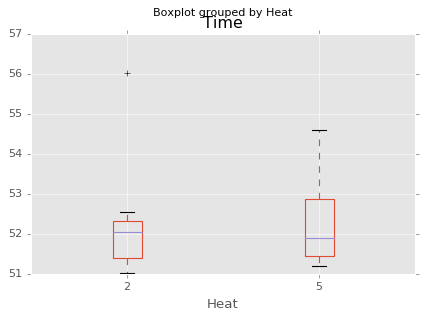

In [35]:
df.boxplot(column="Time", by="Heat");

In [36]:
df.groupby(by="Heat").agg(['mean', 'std', 'count'])

Time                
           mean       std count
Heat                           
2     52.355714  1.693191     7
5     52.328571  1.200547     7

In [31]:
y2 = 52.3557
n2 = 7
s2 = 1.6932

y5 = 52.3286
n5 = 7
s5 = 1.2005

# H0: y2 - y5 == 0
# HA: y2 - y5 <> 0

se = math.sqrt(s2 ** 2 / n2 + s5 ** 2 / n5)
diff = y2 - y5

tval = diff / se
df = degrees_freedom(s2, n2, s5, n5)

pvalue = 2 * (1 - t.cdf(tval, df=df))

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 0.027099999999997237
se: 0.7845040735576657
df: 10.815483339157694
t*: 0.0345441163576128
P-value: 0.9730725492640395



In [ ]:
### run again without the outlier in heat 2

In [38]:
df2 = pd.read_table("../data/Running_Heats.txt")
mask = ~((df2.Heat == 2) & (df2.Time > 53))
df2 = df2[mask]
df2.head()

,Country,Name,Heat,Time
0,USA,HENNAGAN Monique,2,51.02
1,BUL,DIMITROVA Mariyana,2,51.29
2,CHA,NADJINA Kaltouma,2,51.50
3,JAM,DAVY Nadia,2,52.04
4,BRA,ALMIRAO Maria Laura,2,52.10


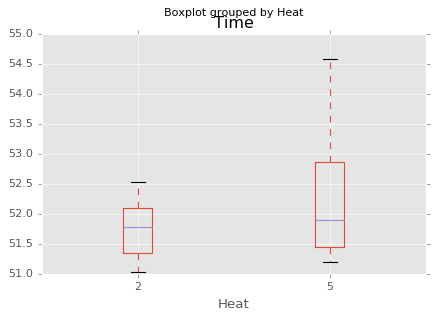

In [40]:
df2.boxplot(column="Time", by="Heat");

In [41]:
df2.groupby(by="Heat").agg(['mean', 'std', 'count'])

Time                
           mean       std count
Heat                           
2     51.746667  0.569550     6
5     52.328571  1.200547     7

In [43]:
y2 = 51.7467
n2 = 6
s2 = 0.5696

y5 = 52.3286
n5 = 7
s5 = 1.2005

# H0: y2 - y5 == 0
# HA: y2 - y5 <> 0

se = math.sqrt(s2 ** 2 / n2 + s5 ** 2 / n5)
diff = y2 - y5

tval = diff / se
df = degrees_freedom(s2, n2, s5, n5)

pvalue = 2 * (t.cdf(tval, df=df))

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: -0.5819000000000045
se: 0.5098625076103034
df: 8.834301884020103
t*: -1.1412880753427759
P-value: 0.2837415877392591



## 24.33

### Answers

* Yes: The evidence supports the claim that there's a positive difference in average ball velocity between regular and stinger tees.  We obtained a p-value of 0.0013, supporting rejection of the null hypothesis.

In [45]:
nr = 6
yr = 127
sr = 0.89

ns = 6
ys = 128.83
ss = 0.41

se = math.sqrt(sr ** 2 / nr + ss ** 2 / ns)
df = degrees_freedom(sr, nr, ss, ns)

# H0: ys - yr = 0
# HA: ys - yr > 0

diff = ys - yr
tval = diff / se

pvalue = 1 - t.cdf(tval, df=df)
print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 1.8300000000000125
se: 0.4000416644967538
df: 7.030746796280294
t*: 4.574523511949996
P-value: 0.0012658511916239235



## 24.35

### Answers

* a) (-103.20881119727784, 74.83999999999992, 252.88881119727768)
* b) Looks ok.

In [17]:
nf = 22 
yf = 1271.59
sf = 261.111

nm = 20
ym = 1196.75
sm = 304.369


diff = yf - ym
se = math.sqrt(sf ** 2 / nf + sm ** 2 / nm)

df = degrees_freedom(sf, nf, sm, nm)

tval = t.ppf(0.975, df=df)

print(template.format(diff=diff, se=se, tval=tval, pvalue="NA", df=df))

(diff - se * tval, diff, diff + se * tval)


diff: 74.83999999999992
se: 87.92649081066112
df: 37.67182005487517
t*: 2.0249734699487094
P-value: NA



(-103.20881119727784, 74.83999999999992, 252.88881119727768)

## 24.37

### Answers

* a) see below: P-value = 0.094 => fail to reject H0; not enough evidence to support the claim of a difference in means across groups
* b) not needed

In [20]:
# H0: mu(none) - mu(rap) == 0
# HA: mu(none) - mu(rap) > 0

yn = 12.77
nn = 13
sn = 4.73

yr = 10.72
nr = 29
sr = 3.99

diff = yn - yr
se = math.sqrt(sn ** 2 / nn + sr ** 2 / nr)
df = degrees_freedom(sn, nn, sr, nr)

tval = diff / se
pvalue = 1 - t.cdf(tval, df=df)

print(template.format(diff=diff, se=se, tval=tval, pvalue=pvalue, df=df))


diff: 2.049999999999999
se: 1.5066390653403188
df: 20.004288181320945
t*: 1.3606443953030953
P-value: 0.09438034283527552

